### Import required dependencies

In [1]:
import pandas as pd
import os

## Deliverable 1: Collect the Data

To collect the data that you’ll need, complete the following steps:

1. Using the Pandas `read_csv` function and the `os` module, import the data from the `new_full_student_data.csv` file, and create a DataFrame called student_df. 

2. Use the head function to confirm that Pandas properly imported the data.


In [2]:
# Create the path and import the data
full_student_data = os.path.join('../Resources/new_full_student_data.csv')
student_df = pd.read_csv(full_student_data)
student_df.head()

,student_id,student_name,grade,school_name,reading_score,math_score,school_type,school_budget
0,103880842,Travis Martin,9th,Sullivan High School,59.0,88.2,Public,961125
1,45069750,Michael Brown,9th,Dixon High School,94.7,73.5,Charter,870334
2,45024902,Gabriela Lucero,9th,Wagner High School,89.0,70.4,Public,846745
3,62582498,Susan Richardson,9th,Silva High School,69.7,80.3,Public,991918
4,16437227,Sherry Davis,11th,Bowers High School,NaN,27.5,Public,848324


In [3]:
# Verify that the data was properly imported
student_df.head()

,student_id,student_name,grade,school_name,reading_score,math_score,school_type,school_budget
0,103880842,Travis Martin,9th,Sullivan High School,59.0,88.2,Public,961125
1,45069750,Michael Brown,9th,Dixon High School,94.7,73.5,Charter,870334
2,45024902,Gabriela Lucero,9th,Wagner High School,89.0,70.4,Public,846745
3,62582498,Susan Richardson,9th,Silva High School,69.7,80.3,Public,991918
4,16437227,Sherry Davis,11th,Bowers High School,NaN,27.5,Public,848324


## Deliverable 2: Prepare the Data

To prepare and clean your data for analysis, complete the following steps:
    
1. Check for and remove all rows with `NaN`, or missing, values in the student DataFrame. 

2. Check for and remove all duplicate rows in the student DataFrame.

3. Use the `str.replace` function to remove the "th" from the grade levels in the grade column.

4. Check data types using the `dtypes` property.

5. Remove the "th" suffix from every value in the grade column using `str` and `replace`.

6. Change the grade colum to the `int` type and verify column types.

7. Use the head (and/or the tail) function to preview the DataFrame.

In [4]:
# Check for null values
student_df.isnull().sum()

student_id          0
student_name        0
grade               0
school_name         0
reading_score    1968
math_score        982
school_type         0
school_budget       0
dtype: int64

In [5]:
# Drop rows with null values and verify removal
student_df = student_df.dropna()
student_df.isnull().sum()

student_id       0
student_name     0
grade            0
school_name      0
reading_score    0
math_score       0
school_type      0
school_budget    0
dtype: int64

In [6]:
# Check for duplicated rows
student_df.duplicated().sum()

1836

In [7]:
# Drop duplicated rows and verify removal
student_df = student_df.drop_duplicates()
student_df.duplicated().sum()

0

In [8]:
# Check data types
student_df.dtypes

student_id         int64
student_name      object
grade             object
school_name       object
reading_score    float64
math_score       float64
school_type       object
school_budget      int64
dtype: object

In [9]:
# Examine the grade column to understand why it is not an int
student_df['grade']

0         9th
1         9th
2         9th
3         9th
5         9th
         ... 
19508    10th
19509    12th
19511    11th
19512    11th
19513    12th
Name: grade, Length: 14831, dtype: object

In [10]:
# Remove the non-numeric characters and verify the contents of the column
student_df['grade'] = student_df['grade'].str.replace('th', '')
student_df

,student_id,student_name,grade,school_name,reading_score,math_score,school_type,school_budget
0,103880842,Travis Martin,9,Sullivan High School,59.0,88.2,Public,961125
1,45069750,Michael Brown,9,Dixon High School,94.7,73.5,Charter,870334
2,45024902,Gabriela Lucero,9,Wagner High School,89.0,70.4,Public,846745
3,62582498,Susan Richardson,9,Silva High School,69.7,80.3,Public,991918
5,74579444,Cynthia Johnson,9,Montgomery High School,63.5,76.9,Charter,893368
...,...,...,...,...,...,...,...,...
19508,83985333,Deborah Sanders,10,Silva High School,60.5,64.6,Public,991918
19509,109236636,Robert Sawyer,12,Silva High School,43.3,27.2,Public,991918
19511,95516554,Megan Gill,11,Wagner High School,93.9,84.1,Public,846745
19512,65050383,Lori Stone,11,Bowers High School,94.6,70.9,Public,848324


In [11]:
student_df.dtypes

student_id         int64
student_name      object
grade             object
school_name       object
reading_score    float64
math_score       float64
school_type       object
school_budget      int64
dtype: object

In [12]:
# Change the grade column to the int type and verify column types
student_df['grade'] = student_df['grade'].astype(int)

student_df.dtypes

student_id         int64
student_name      object
grade              int32
school_name       object
reading_score    float64
math_score       float64
school_type       object
school_budget      int64
dtype: object

## Deliverable 3: Summarize the Data

Describe the data using summary statistics on the data as a whole and on individual columns.

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. Display the mean math score using the `mean` function. 

2. Store the minimum reading score as `min_reading_score`.

In [13]:
# Display summary statistics for the DataFrame
student_df.describe()

,student_id,grade,reading_score,math_score,school_budget
count,1.483100e+04,14831.000000,14831.000000,14831.000000,14831.000000
mean,6.975296e+07,10.355539,72.357865,64.675733,893742.749107
std,3.452909e+07,1.097728,15.224590,15.844093,53938.066467
min,1.000906e+07,9.000000,10.500000,3.700000,817615.000000
25%,3.984433e+07,9.000000,62.200000,54.500000,846745.000000
50%,6.965978e+07,10.000000,73.800000,65.300000,893368.000000
75%,9.927449e+07,11.000000,84.000000,76.000000,956438.000000
max,1.299997e+08,12.000000,100.000000,100.000000,991918.000000


In [14]:
# Display the mean math score using the mean function
student_df["math_score"].mean()

64.67573326141189

In [15]:
# Store the minimum reading score as min_reading_score
min_reading_score = student_df['reading_score'].min()
min_reading_score

10.5

## Deliverable 4: Drill Down into the Data

Drill down to specific rows, columns, and subsets of the data.

To drill down into the data, complete the following steps:

1. Use `loc` to display the grade column.

2. Use `iloc` to display the first 3 rows and columns 3, 4, and 5.

3. Show the rows for grade nine using `loc`.

4. Store the row with the minimum overall reading score as `min_reading_row` using `loc` and the `min_reading_score` found in Deliverable 3.

5. Find the reading scores for the school and grade from the output of step three using `loc` with multiple conditional statements.

6. Using conditional statements and `loc` or `iloc`, find the mean reading score for all students in grades 11 and 12 combined.

In [16]:
# Use loc to display the grade column
student_df.loc[:,'grade']

0         9
1         9
2         9
3         9
5         9
         ..
19508    10
19509    12
19511    11
19512    11
19513    12
Name: grade, Length: 14831, dtype: int32

In [17]:
# Use `iloc` to display the first 3 rows and columns 3, 4, and 5.
student_df.iloc[:3,3:6]

,school_name,reading_score,math_score
0,Sullivan High School,59.0,88.2
1,Dixon High School,94.7,73.5
2,Wagner High School,89.0,70.4


In [18]:
student_df

,student_id,student_name,grade,school_name,reading_score,math_score,school_type,school_budget
0,103880842,Travis Martin,9,Sullivan High School,59.0,88.2,Public,961125
1,45069750,Michael Brown,9,Dixon High School,94.7,73.5,Charter,870334
2,45024902,Gabriela Lucero,9,Wagner High School,89.0,70.4,Public,846745
3,62582498,Susan Richardson,9,Silva High School,69.7,80.3,Public,991918
5,74579444,Cynthia Johnson,9,Montgomery High School,63.5,76.9,Charter,893368
...,...,...,...,...,...,...,...,...
19508,83985333,Deborah Sanders,10,Silva High School,60.5,64.6,Public,991918
19509,109236636,Robert Sawyer,12,Silva High School,43.3,27.2,Public,991918
19511,95516554,Megan Gill,11,Wagner High School,93.9,84.1,Public,846745
19512,65050383,Lori Stone,11,Bowers High School,94.6,70.9,Public,848324


In [19]:
# Select the rows for grade nine and display their summary statistics using `loc` and `describe`.
freshman_sum = student_df.loc[student_df['grade'] == 9].describe()
freshman_sum

,student_id,grade,reading_score,math_score,school_budget
count,4.132000e+03,4132.0,4132.000000,4132.000000,4132.000000
mean,6.979441e+07,9.0,69.236713,66.585624,898692.606002
std,3.470565e+07,0.0,15.277354,16.661533,54891.596611
min,1.000906e+07,9.0,17.900000,5.300000,817615.000000
25%,3.953848e+07,9.0,59.000000,56.000000,846745.000000
50%,6.984037e+07,9.0,70.050000,67.800000,893368.000000
75%,9.939504e+07,9.0,80.500000,78.500000,957299.000000
max,1.299997e+08,9.0,99.900000,100.000000,991918.000000


In [20]:
# Store the row with the minimum overall reading score as `min_reading_row`
# using `loc` and the `min_reading_score` found in Deliverable 3.
min_reading_row = student_df.loc[student_df['reading_score'] == min_reading_score]
min_reading_row

,student_id,student_name,grade,school_name,reading_score,math_score,school_type,school_budget
3706,81758630,Matthew Thomas,10,Dixon High School,10.5,58.4,Charter,870334


In [21]:
student_df

,student_id,student_name,grade,school_name,reading_score,math_score,school_type,school_budget
0,103880842,Travis Martin,9,Sullivan High School,59.0,88.2,Public,961125
1,45069750,Michael Brown,9,Dixon High School,94.7,73.5,Charter,870334
2,45024902,Gabriela Lucero,9,Wagner High School,89.0,70.4,Public,846745
3,62582498,Susan Richardson,9,Silva High School,69.7,80.3,Public,991918
5,74579444,Cynthia Johnson,9,Montgomery High School,63.5,76.9,Charter,893368
...,...,...,...,...,...,...,...,...
19508,83985333,Deborah Sanders,10,Silva High School,60.5,64.6,Public,991918
19509,109236636,Robert Sawyer,12,Silva High School,43.3,27.2,Public,991918
19511,95516554,Megan Gill,11,Wagner High School,93.9,84.1,Public,846745
19512,65050383,Lori Stone,11,Bowers High School,94.6,70.9,Public,848324


In [22]:
# Use loc with conditionals to select all reading scores from 10th graders at Dixon High School.
soph_reading_score = student_df.loc[(student_df["school_name"] == "Dixon High School") &
(student_df["grade"] == 10), ["school_name", "reading_score"]]
soph_reading_score

,school_name,reading_score
45,Dixon High School,71.1
60,Dixon High School,59.5
69,Dixon High School,88.6
94,Dixon High School,81.5
100,Dixon High School,95.3
...,...,...
19283,Dixon High School,52.9
19306,Dixon High School,58.0
19344,Dixon High School,38.0
19368,Dixon High School,84.4


In [31]:
# Find the mean reading score for all students in grades 11 and 12 combined.
higher_classman = student_df.loc[(student_df["grade"] == 11) |
(student_df["grade"] == 12)]
higher_classman_reading_score_average = higher_classman["reading_score"].mean()
higher_classman_reading_score_average

74.90038089192188

In [24]:
# Mean math score for all students in grades 11 and 12 combined.
higher_classman_reading_score_average = higher_classman["math_score"].mean()
higher_classman_reading_score_average

63.25853039200117

## Deliverable 5: Make Comparisons Between District and Charter Schools

Compare district vs charter schools for budget, size, and scores.

Make comparisons within your data by completing the following steps:

1. Using the `groupby` and `mean` functions, look at the average reading and math scores per school type.

1. Using the `groupby` and `count` functions, find the total number of students at each school.

2. Using the `groupby` and `mean` functions, find the average budget per grade for each school type.

In [25]:
# Use groupby and mean to find the average reading and math scores for each school type.
scores_school_type = student_df.groupby("school_type")[["reading_score", "math_score"]].mean()
scores_school_type

,reading_score,math_score
school_type,,
Charter,72.450603,66.761883
Public,72.281219,62.951576


<AxesSubplot:title={'center':'Reading and Math Scores by School Type'}, ylabel='School Type'>

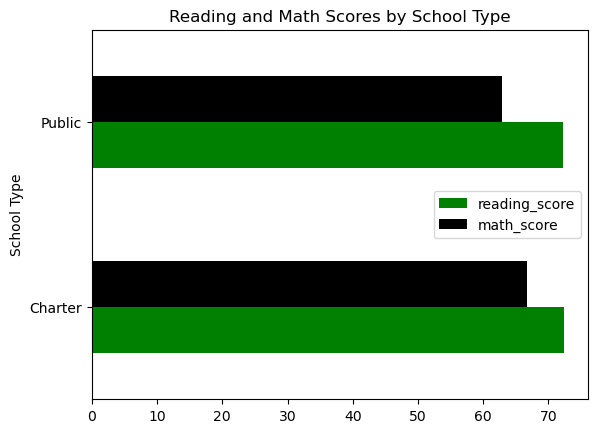

In [26]:
colors = ['green', 'black']
scores_school_type.plot(kind='barh', color=colors, xlabel="School Type", title="Reading and Math Scores by School Type")

In [27]:
# Use the `groupby`, `count`, and `sort_values` functions to find the
# total number of students at each school and sort from most students to least students.
student_count = student_df.groupby('school_name') [['student_id']].count()
student_count.sort_values(by='student_id', ascending = False)

,student_id
school_name,
Montgomery High School,2038
Green High School,1961
Dixon High School,1583
Wagner High School,1541
Silva High School,1109
Woods High School,1052
Sullivan High School,971
Turner High School,846
Bowers High School,803


In [28]:
# Using the groupby and mean functions, find the average budget per grade for each school type
avg_budget = student_df.groupby(["school_type", "grade"]) ["school_budget"].mean()
avg_budget

school_type  grade
Charter      9        863817.290130
             10       871823.608811
             11       874262.713649
             12       885096.335017
Public       9        926800.159528
             10       914715.360382
             11       900248.905136
             12       895952.915971
Name: school_budget, dtype: float64

<AxesSubplot:title={'center':'School Budget'}, ylabel='School Type and Grade'>

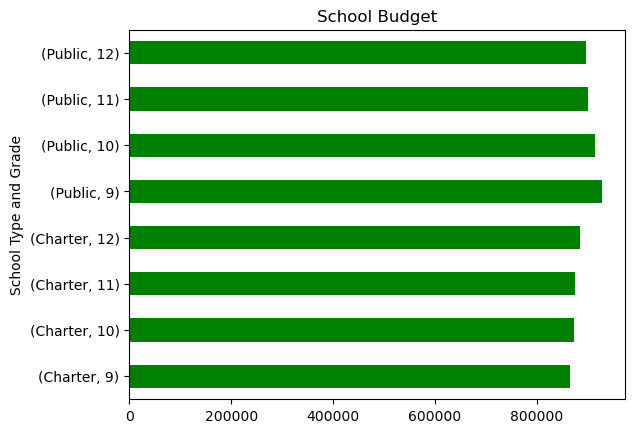

In [29]:
avg_budget.plot(x="grade", y="school_budget", kind="barh", color = "green", xlabel="School Type and Grade",
title="School Budget")

# Deliverable 6: Summarize Your Findings
In the cell below, write a few sentences to describe any discoveries you made while performing your analysis along with any additional analysis you believe would be worthwhile.

*your summary here*

In [30]:
#After performing the school district analysis the filtered results show that charter schools have a higher reading level. 
#However the public school district has a higher math score.
